# Stacking the output of all models into other algorithms 
Ouput of various algorithms are given as input to
1. Linear Regression
2. LGBoost

### Lets visualize output of all 4 algorithms againsts one another 

In [79]:
%matplotlib inline  
import pandas as pd

In [80]:
lasso_train = pd.read_csv("./processeddata/lasso_op_train.csv")

In [81]:
xgb_train = pd.read_csv("./processeddata/xgb_op_train.csv")

In [82]:
lgb_train = pd.read_csv("./processeddata/lgb_op_cv_train.csv")

In [83]:
NB_train = pd.read_csv("./processeddata/NB_op_train.csv")

In [84]:
print lasso_train.head()
print xgb_train.head()
print lgb_train.head()
print NB_train.head()

   Unnamed: 0  deal_probability
0           0          0.201274
1           1          0.134052
2           2          0.136598
3           3          0.119511
4           4          0.125406
   Unnamed: 0  deal_probability
0           0          0.086380
1           1          0.170011
2           2          0.225899
3           3          0.290100
4           4          0.374119
        item_id  deal_probability
0  b912c3c6a6ad          0.041272
1  2dac0150717d          0.203866
2  ba83aefab5dc          0.137070
3  02996f1dd2ea          0.266020
4  7c90be56d2ab          0.518546
   Unnamed: 0  deal_probability
0           0          0.224732
1           1          0.126821
2           2          0.117953
3           3          0.121713
4           4          0.132075


In [85]:
train = pd.read_csv('./processeddata/traindata_no_text_processing.csv')


In [86]:
y = train.iloc[:,-1]
print y.head()
print y.shape


0    0.12789
1    0.00000
2    0.43177
3    0.80323
4    0.20797
Name: deal_probability, dtype: float64
(1503424,)


In [87]:
alll_train = pd.DataFrame(pd.concat([lasso_train['deal_probability'],xgb_train['deal_probability'],lgb_train['deal_probability'],NB_train['deal_probability']],axis = 1))

In [88]:
alll_train.columns = ['lasso','xgb','lgb','nb'] 
print alll_train.head()
print alll_train.shape

      lasso       xgb       lgb        nb
0  0.201274  0.086380  0.041272  0.224732
1  0.134052  0.170011  0.203866  0.126821
2  0.136598  0.225899  0.137070  0.117953
3  0.119511  0.290100  0.266020  0.121713
4  0.125406  0.374119  0.518546  0.132075
(1503424, 4)


In [89]:
## x = alll_train y = y



In [90]:
lasso_test = pd.read_csv("./processeddata/lasso_op.csv")

In [91]:
xgb_test = pd.read_csv("./processeddata/xgb_op_cv.csv")

In [92]:
lgb_test = pd.read_csv("./processeddata/lgb_op_cv.csv")

In [93]:
NB_test = pd.read_csv("./processeddata/NB_op.csv")

In [94]:
print lasso_test.head()
print xgb_test.head()
print lgb_test.head()
print NB_test.head()

        item_id  deal_probability
0  6544e41a8817          0.106435
1  65b9484d670f          0.160259
2  8bab230b2ecd          0.172814
3  8e348601fefc          0.158577
4  8bd2fe400b89          0.179510
        item_id  deal_probability
0  6544e41a8817          0.116911
1  65b9484d670f          0.191814
2  8bab230b2ecd          0.249451
3  8e348601fefc          0.178589
4  8bd2fe400b89          0.269799
        item_id  deal_probability
0  6544e41a8817          0.102036
1  65b9484d670f          0.308063
2  8bab230b2ecd          0.260494
3  8e348601fefc          0.129886
4  8bd2fe400b89          0.276928
        item_id  deal_probability
0  6544e41a8817          0.254230
1  65b9484d670f          0.338527
2  8bab230b2ecd          0.313583
3  8e348601fefc          0.315558
4  8bd2fe400b89          0.354107


In [95]:
alll_test = pd.DataFrame(pd.concat([lasso_test['deal_probability'],xgb_test['deal_probability'],lgb_test['deal_probability'],NB_test['deal_probability']],axis = 1))

In [96]:
alll_test.columns = ['lasso','xgb','lgb','nb'] 
alll_test.head()

,lasso,xgb,lgb,nb
0,0.106435,0.116911,0.102036,0.254230
1,0.160259,0.191814,0.308063,0.338527
2,0.172814,0.249451,0.260494,0.313583
3,0.158577,0.178589,0.129886,0.315558
4,0.179510,0.269799,0.276928,0.354107


In [108]:
columns_used = ['nb','xgb','lgb']

In [109]:
%%time


from sklearn.linear_model import LassoCV
lasso = LassoCV(cv = 5,normalize=True)
lassomodel = lasso.fit(alll_train[columns_used], y)

CPU times: user 11 s, sys: 2.29 s, total: 13.3 s
Wall time: 13.4 s


In [110]:
print lassomodel.alpha_
print lassomodel.coef_
print lassomodel.intercept_
print lassomodel.alphas_
print lassomodel.n_iter_

1.01277370816e-07
[-0.0473768   0.32204392  0.7240102 ]
-0.000422244783291
[  1.01277371e-04   9.44516150e-05   8.80858923e-05   8.21491979e-05
   7.66126169e-05   7.14491830e-05   6.66337472e-05   6.21428556e-05
   5.79546351e-05   5.40486867e-05   5.04059861e-05   4.70087913e-05
   4.38405561e-05   4.08858494e-05   3.81302800e-05   3.55604267e-05
   3.31637730e-05   3.09286457e-05   2.88441585e-05   2.69001587e-05
   2.50871781e-05   2.33963862e-05   2.18195481e-05   2.03489836e-05
   1.89775302e-05   1.76985082e-05   1.65056880e-05   1.53932598e-05
   1.43558056e-05   1.33882724e-05   1.24859476e-05   1.16444366e-05
   1.08596405e-05   1.01277371e-05   9.44516150e-06   8.80858923e-06
   8.21491979e-06   7.66126169e-06   7.14491830e-06   6.66337472e-06
   6.21428556e-06   5.79546351e-06   5.40486867e-06   5.04059861e-06
   4.70087913e-06   4.38405561e-06   4.08858494e-06   3.81302800e-06
   3.55604267e-06   3.31637730e-06   3.09286457e-06   2.88441585e-06
   2.69001587e-06   2.508717

In [111]:
predcited_lasso_test = lassomodel.predict(alll_test[columns_used])

In [112]:
predcited_lasso_test.shape

(508438,)

In [113]:
testdata = pd.read_csv('test.csv', index_col = "item_id", parse_dates = ["activation_date"])
testdatai = testdata.index



In [114]:

Lassoop = pd.DataFrame(predcited_lasso_test,columns=["deal_probability"],index=testdatai)



In [115]:
Lassoop["deal_probability"] = Lassoop["deal_probability"].clip(0.0, 1.0 ) # Between 0 and 1

print all(i > 1.0 for i in Lassoop.values)
print all(i < .0 for i in Lassoop.values)


False
False


In [116]:
Lassoop.head()

,deal_probability
item_id,
6544e41a8817,0.099059
65b9484d670f,0.268353
8bab230b2ecd,0.253655
8e348601fefc,0.136180
8bd2fe400b89,0.270187


In [117]:
Lassoop.to_csv("./processeddata/lasso_on_all_except_lasso_final.csv",index=True,header=True)


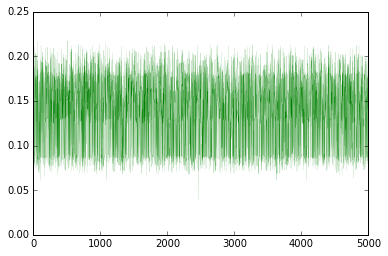

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import plot
alll_train40 = alll_train.iloc[0:5000,:]
plot(alll_train40.index, alll_train40['lasso'], color='green', marker='o',linewidth=.1, markersize=0.001)
#plt.scatter(alll_train.index, alll_train['lasso'])

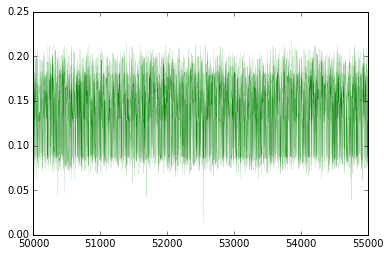

In [23]:
alll_train40 = alll_train.iloc[50000:55000,:]
plot(alll_train40.index, alll_train40['lasso'], color='green', marker='o',linewidth=.1, markersize=0.001)



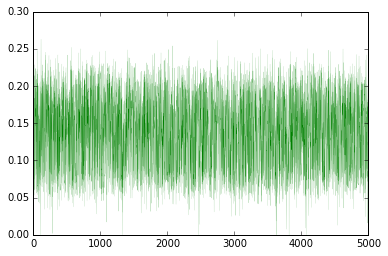

In [24]:
alll_train40 = alll_train.iloc[0:5000,:]
plot(alll_train40.index, alll_train40['xgb'], color='green', marker='o',linewidth=.1, markersize=0.001)



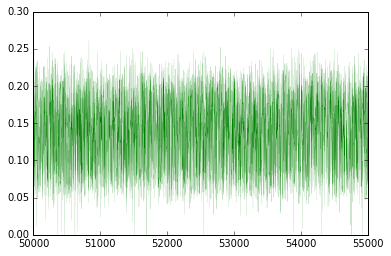

In [25]:
alll_train40 = alll_train.iloc[50000:55000,:]

plot(alll_train40.index, alll_train40['xgb'], color='green', marker='o',linewidth=.1, markersize=0.001)




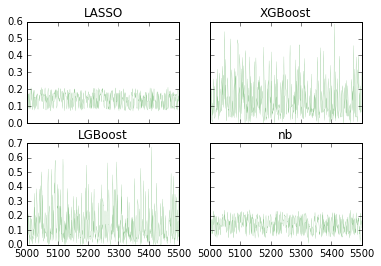

In [153]:
import matplotlib.pyplot as plt

alll_train40 = alll_train.iloc[5000:5500,:]


f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
#plt.figure(figsize=(200,200))
ax1.plot(alll_train40.index, alll_train40['lasso'], color='green', marker='o',linewidth=.1, markersize=0.001)
ax1.set_title('LASSO')
ax2.plot(alll_train40.index, alll_train40['xgb'], color='green', marker='o',linewidth=.1, markersize=0.001)
ax2.set_title('XGBoost')
ax3.plot(alll_train40.index, alll_train40['lgb'], color='green', marker='o',linewidth=.1, markersize=0.001)
ax3.set_title('LGBoost')
ax4.plot(alll_train40.index, alll_train40['nb'], color='green', marker='o',linewidth=.1, markersize=0.001)
ax4.set_title('nb')




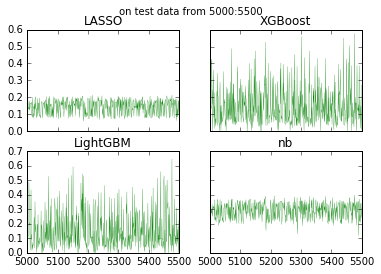

In [158]:
import matplotlib.pyplot as plt

alll_train40 = alll_test.iloc[5000:5500,:]
mark = 0.01
line = 0.25
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
#plt.figure(figsize=(200,200))
plt.suptitle(' on test data from 5000:5500')


ax1.plot(alll_train40.index, alll_train40['lasso'], color='green', marker='o',linewidth=line, markersize=mark)
ax1.set_title('LASSO')
ax2.plot(alll_train40.index, alll_train40['xgb'], color='green', marker='o',linewidth=line, markersize=mark)
ax2.set_title('XGBoost')
ax3.plot(alll_train40.index, alll_train40['lgb'], color='green', marker='o',linewidth=line, markersize=mark)
ax3.set_title('LightGBM')
ax4.plot(alll_train40.index, alll_train40['nb'], color='green', marker='o',linewidth=line, markersize=mark)
ax4.set_title('nb')


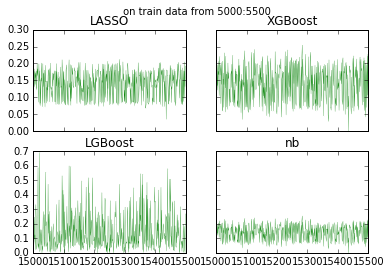

In [51]:
import matplotlib.pyplot as plt

alll_train40 = alll_train.iloc[15000:15500,:]
mark = 0.01
line = 0.25
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
#plt.figure(figsize=(200,200))
plt.suptitle(' on train data from 5000:5500')


ax1.plot(alll_train40.index, alll_train40['lasso'], color='green', marker='o',linewidth=line, markersize=mark)
ax1.set_title('LASSO')
ax2.plot(alll_train40.index, alll_train40['xgb'], color='green', marker='o',linewidth=line, markersize=mark)
ax2.set_title('XGBoost')
ax3.plot(alll_train40.index, alll_train40['lgb'], color='green', marker='o',linewidth=line, markersize=mark)
ax3.set_title('LGBoost')
ax4.plot(alll_train40.index, alll_train40['nb'], color='green', marker='o',linewidth=line, markersize=mark)
ax4.set_title('nb')



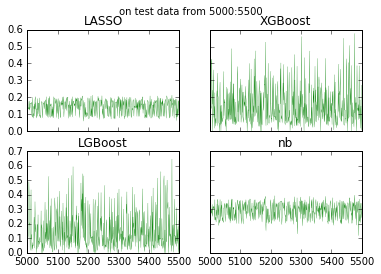

In [154]:
import matplotlib.pyplot as plt

alll_train40 = alll_test.iloc[5000:5500,:]
mark = 0.01
line = 0.25
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
#plt.figure(figsize=(200,200))
plt.suptitle(' on test data from 5000:5500')


ax1.plot(alll_train40.index, alll_train40['lasso'], color='green', marker='o',linewidth=line, markersize=mark)
ax1.set_title('LASSO')
ax2.plot(alll_train40.index, alll_train40['xgb'], color='green', marker='o',linewidth=line, markersize=mark)
ax2.set_title('XGBoost')
ax3.plot(alll_train40.index, alll_train40['lgb'], color='green', marker='o',linewidth=line, markersize=mark)
ax3.set_title('LGBoost')
ax4.plot(alll_train40.index, alll_train40['nb'], color='green', marker='o',linewidth=line, markersize=mark)
ax4.set_title('nb')


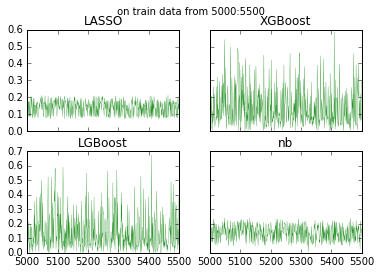

In [155]:
import matplotlib.pyplot as plt

alll_train40 = alll_train.iloc[5000:5500,:]
mark = 0.01
line = 0.25
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
#plt.figure(figsize=(200,200))
plt.suptitle(' on train data from 5000:5500')


ax1.plot(alll_train40.index, alll_train40['lasso'], color='green', marker='o',linewidth=line, markersize=mark)
ax1.set_title('LASSO')
ax2.plot(alll_train40.index, alll_train40['xgb'], color='green', marker='o',linewidth=line, markersize=mark)
ax2.set_title('XGBoost')
ax3.plot(alll_train40.index, alll_train40['lgb'], color='green', marker='o',linewidth=line, markersize=mark)
ax3.set_title('LGBoost')
ax4.plot(alll_train40.index, alll_train40['nb'], color='green', marker='o',linewidth=line, markersize=mark)
ax4.set_title('nb')



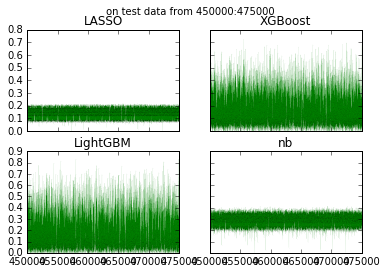

In [159]:
import matplotlib.pyplot as plt

alll_train40 = alll_test.iloc[450000:475000,:]
mark = 0.01
line = 0.05
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
#plt.figure(figsize=(200,200))
plt.suptitle(' on test data from 450000:475000')


ax1.plot(alll_train40.index, alll_train40['lasso'], color='green', marker='o',linewidth=line, markersize=mark)
ax1.set_title('LASSO')
ax2.plot(alll_train40.index, alll_train40['xgb'], color='green', marker='o',linewidth=line, markersize=mark)
ax2.set_title('XGBoost')
ax3.plot(alll_train40.index, alll_train40['lgb'], color='green', marker='o',linewidth=line, markersize=mark)
ax3.set_title('LightGBM')
ax4.plot(alll_train40.index, alll_train40['nb'], color='green', marker='o',linewidth=line, markersize=mark)
ax4.set_title('nb')


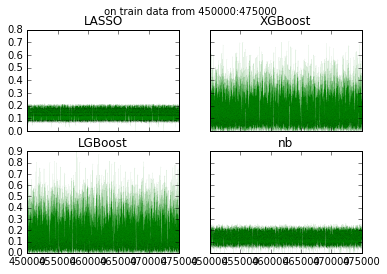

In [157]:
import matplotlib.pyplot as plt

alll_train40 = alll_train.iloc[450000:475000,:]
mark = 0.01
line = 0.05
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
#plt.figure(figsize=(200,200))
plt.suptitle(' on train data from 450000:475000')


ax1.plot(alll_train40.index, alll_train40['lasso'], color='green', marker='o',linewidth=line, markersize=mark)
ax1.set_title('LASSO')
ax2.plot(alll_train40.index, alll_train40['xgb'], color='green', marker='o',linewidth=line, markersize=mark)
ax2.set_title('XGBoost')
ax3.plot(alll_train40.index, alll_train40['lgb'], color='green', marker='o',linewidth=line, markersize=mark)
ax3.set_title('LGBoost')
ax4.plot(alll_train40.index, alll_train40['nb'], color='green', marker='o',linewidth=line, markersize=mark)
ax4.set_title('nb')



## till here 

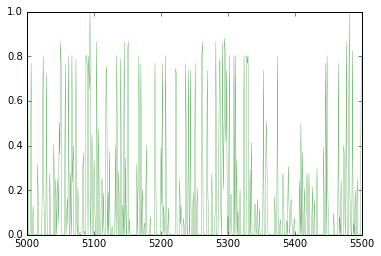

In [77]:

alll_train40 = y.iloc[5000:5500]
mark = 0.01
line = 0.25
fig = plot(alll_train40.index, alll_train40, color='green', marker='o',linewidth=line, markersize=mark)


In [ ]:

alll_train40 = y.iloc[5000:5500]
mark = 0.01
line = 0.25
fig = plot(alll_train40.index, alll_train40, color='green', marker='o',linewidth=line, markersize=mark)



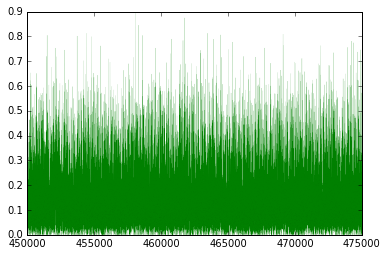

In [78]:
alll_train40 = alll_train.iloc[450000:475000,:]

plot(alll_train40.index, alll_train40['lgb'], color='green', marker='o',linewidth=.1, markersize=0.001)



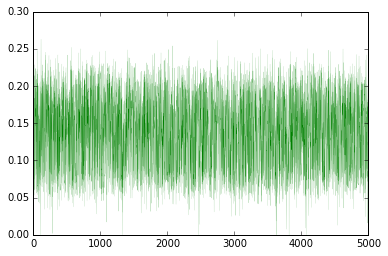

In [101]:
alll_train40 = alll_train.iloc[0:5000,:]
plot(alll_train40.index, alll_train40['nb'], color='green', marker='o',linewidth=.1, markersize=0.001)



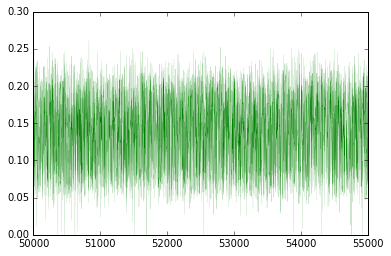

In [106]:
alll_train40 = alll_train.iloc[50000:55000,:]

plot(alll_train40.index, alll_train40['nb'], color='green', marker='o',linewidth=.1, markersize=0.001)



# Stacking from here 

In [54]:
alll.columns = ["item_id","xgb","lgb"]
alll.head()

,item_id,xgb,lgb
0,6544e41a8817,0.116911,0.102036
1,65b9484d670f,0.191814,0.308063
2,8bab230b2ecd,0.249451,0.260494
3,8e348601fefc,0.178589,0.129886
4,8bd2fe400b89,0.269799,0.276928


In [55]:
alll["deal_probability"] = alll.iloc[:,1:2].mean(axis=1)

In [56]:
alll.head()

,item_id,xgb,lgb,deal_probability
0,6544e41a8817,0.116911,0.102036,0.116911
1,65b9484d670f,0.191814,0.308063,0.191814
2,8bab230b2ecd,0.249451,0.260494,0.249451
3,8e348601fefc,0.178589,0.129886,0.178589
4,8bd2fe400b89,0.269799,0.276928,0.269799


In [57]:
lgboop = alll[["item_id","deal_probability"]]
#lgboop = pd.DataFrame(alll,columns=["deal_probability"],index=lasso.index)
lgboop.head()

,item_id,deal_probability
0,6544e41a8817,0.116911
1,65b9484d670f,0.191814
2,8bab230b2ecd,0.249451
3,8e348601fefc,0.178589
4,8bd2fe400b89,0.269799


In [59]:
lgboop.to_csv("./processeddata/avg_xgb_lgb.csv",index=False,header=True)
### output same as lgboost 

In [19]:
for i in range(0,5):
    print geo_mean_overflow(alll.iloc[i:i+1,:].values)
    

0.00126968677091
0.00946984530823
0.0112294992895
0.00367839073286
0.0134120878799


In [12]:
#pd.DataFrame([gmean(alll,axis=1)],index=lasso.index)

In [18]:
import numpy as np

def geo_mean_overflow(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

In [60]:
from sklearn.metrics import mean_squared_error


In [61]:
allzeros = 0.3032 # publicLB


In [64]:
lgb['allzero'] = 0
np.sqrt(mean_squared_error(lgb.deal_probability, lgb['allzero'] ))

0.20132586607378741

In [65]:
allzeros / 0.20132586607378741

1.506016121589041

In [74]:
lasso.deal_probability *= 1.506016121589041

In [77]:
lasso.to_csv("./processeddata/lasso_something.csv",index=False,header=True)



In [78]:
lasso.head()

,item_id,deal_probability
0,6544e41a8817,0.160293
1,65b9484d670f,0.241353
2,8bab230b2ecd,0.260261
3,8e348601fefc,0.238820
4,8bd2fe400b89,0.270345


In [ ]:
#    lasso       xgb       lgb        nb
# lasso xgb 0.256 'lasso','xgb','nb'
# lasso xgb lgb 0.4

In [118]:
columns_used = ['lasso','nb','xgb','lgb']

In [119]:
%%time
import statsmodels.api as sm
model = sm.OLS(y,alll_train[columns_used])
model.fit()

CPU times: user 1.19 s, sys: 524 ms, total: 1.71 s
Wall time: 6.49 s


In [120]:
alll_train[columns_used].shape
y.shape

(1503424,)

In [121]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       deal_probability   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                 2.527e+05
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        19:39:34   Log-Likelihood:                 88841.
No. Observations:             1503424   AIC:                        -1.777e+05
Df Residuals:                 1503420   BIC:                        -1.776e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lasso         -0.0238      0.011     -2.129      0.033      -0.046      -0.002
nb            -0.0294      0.011     -2.653      0.008      -0.051      -0.008
xgb            0.3235      0.004     74.858      0.000       0.315       0.332
lgb            0.7246      0.004    201.916      0.000       0.718       0.732
==============================================================================
Omnibus:                   420547.289   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1034044.160
Skew:                           1.559   Prob(JB):                         0.00
Kurtosis:                       5.605   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
%%time
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(alll_train[columns_used],y)

CPU times: user 317 ms, sys: 110 ms, total: 427 ms
Wall time: 719 ms


In [123]:
lm.score(alll_train[columns_used],y)

0.23088964806707191

In [124]:
predcited_lasso_test = lm.predict(alll_test[columns_used])

In [125]:
predcited_lasso_test.shape

(508438,)

In [128]:
testdata = pd.read_csv('test.csv', index_col = "item_id", parse_dates = ["activation_date"])
testdatai = testdata.index



In [126]:

Lassoop = pd.DataFrame(predcited_lasso_test,columns=["deal_probability"],index=testdatai)



In [127]:
Lassoop["deal_probability"] = Lassoop["deal_probability"].clip(0.0, 1.0 ) # Between 0 and 1

print all(i > 1.0 for i in Lassoop.values)
print all(i < .0 for i in Lassoop.values)


False
False


In [128]:
Lassoop.head()

,deal_probability
item_id,
6544e41a8817,0.104817
65b9484d670f,0.274440
8bab230b2ecd,0.258253
8e348601fefc,0.141431
8bd2fe400b89,0.275900


In [129]:
Lassoop.to_csv("./processeddata/OLS_on_all_outputs_final.csv",index=True,header=True)


### ols on output gave 0.2334


In [ ]:
#    lasso       xgb       lgb        nb
# lasso nb 0.2805


In [141]:
columns_used = ['lasso','nb','xgb']



In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(alll_train[columns_used], y, test_size=0.2, random_state=42)

In [143]:
%%time
import json
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)

CPU times: user 61 µs, sys: 203 µs, total: 264 µs
Wall time: 290 µs


In [144]:
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l1', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [145]:
%%time
print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=50,
                valid_sets=lgb_eval,
                early_stopping_rounds=10)

Start training...
[1]	valid_0's l1: 0.187777	valid_0's auc: 0.751944
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's l1: 0.186992	valid_0's auc: 0.751992
[3]	valid_0's l1: 0.186259	valid_0's auc: 0.744229
[4]	valid_0's l1: 0.18421	valid_0's auc: 0.752068
[5]	valid_0's l1: 0.182317	valid_0's auc: 0.754604
[6]	valid_0's l1: 0.180594	valid_0's auc: 0.755622
[7]	valid_0's l1: 0.179038	valid_0's auc: 0.755912
[8]	valid_0's l1: 0.178577	valid_0's auc: 0.755737
[9]	valid_0's l1: 0.178144	valid_0's auc: 0.75483
[10]	valid_0's l1: 0.17677	valid_0's auc: 0.755593
[11]	valid_0's l1: 0.175492	valid_0's auc: 0.75607
[12]	valid_0's l1: 0.174303	valid_0's auc: 0.756232
[13]	valid_0's l1: 0.173191	valid_0's auc: 0.756281
[14]	valid_0's l1: 0.172157	valid_0's auc: 0.756262
[15]	valid_0's l1: 0.171189	valid_0's auc: 0.75623
[16]	valid_0's l1: 0.170275	valid_0's auc: 0.756094
[17]	valid_0's l1: 0.170016	valid_0's auc: 0.756267
[18]	valid_0's l1: 0.169176	valid_0's auc: 0.75617

In [146]:
%%time
%%time
predcited_lasso_test = gbm.predict(alll_test[columns_used], num_iteration=gbm.best_iteration)



CPU times: user 1.1 s, sys: 33.2 ms, total: 1.14 s
Wall time: 396 ms
CPU times: user 1.11 s, sys: 33.8 ms, total: 1.14 s
Wall time: 398 ms


In [147]:
predcited_lasso_test.shape

(508438,)

In [181]:
testdata = pd.read_csv('test.csv', index_col = "item_id", parse_dates = ["activation_date"])
testdatai = testdata.index



In [148]:

Lassoop = pd.DataFrame(predcited_lasso_test,columns=["deal_probability"],index=testdatai)



In [149]:
Lassoop["deal_probability"] = Lassoop["deal_probability"].clip(0.0, 1.0 ) # Between 0 and 1

print all(i > 1.0 for i in Lassoop.values)
print all(i < .0 for i in Lassoop.values)


False
False


In [150]:
Lassoop.head()

,deal_probability
item_id,
6544e41a8817,0.126830
65b9484d670f,0.198909
8bab230b2ecd,0.244399
8e348601fefc,0.194537
8bd2fe400b89,0.258116


In [151]:
Lassoop.to_csv("./processeddata/LGBoost_on_all_except_lgb_final.csv",index=True,header=True)


 "LGBoost_on_outputs.csv" - is using lasso naive bayes gives 0.2805 <br>
 on all 0.2549 <br>
 on xgboost, nb, lasso 0.2764
